# **Import Statements**

In [1]:
import opensim as osim
import matplotlib.pyplot as plt
import numpy as np
from Bicep import Bicep_Curl
#from controller import AdmittanceController
#from trajectories import get_trajectory_functions
from main import run
osim.GetVersionAndDate()


%load_ext autoreload
%autoreload 2

# **Model Parameters**

In [2]:
# Load the model.
arm26 = osim.Model('OpenSIM_utils\\Arm26\\arm26.osim')

# Print metadata.
print("Name of the model:", arm26.getName())
print("Author:", arm26.get_credits())
print("Publications:", arm26.get_publications())
print("Length Unit:", arm26.get_length_units())
print("Force Unit:", arm26.get_force_units())
print("Gravity:", arm26.get_gravity())

# Use the TableProcessor to read the motion file.
tableTime = osim.TimeSeriesTable('OpenSIM_utils\\Arm26\\OutputReference\\InverseKinematics\\arm26_InverseKinematics.mot')
print(tableTime.getColumnLabels())

#Named variables
r_shoulder_elev = tableTime.getDependentColumn('r_shoulder_elev').to_numpy()
r_elbow_flex = tableTime.getDependentColumn('r_elbow_flex').to_numpy()
t = tableTime.getIndependentColumn()


Name of the model: arm26
Author: The OpenSim Development Team (Reinbolt, J; Seth, A; Habib, A; Hamner, S) adapted from a model originally created by Kate Holzbaur (11/22/04) License: Creative Commons (CCBY 3.0). You are free to distribute, remix, tweak, and build upon this work, even commercially, as long as you credit us for the original creation. http://creativecommons.org/licenses/by/3.0/
Publications: Holzbaur, K.R.S., Murray, W.M., Delp, S.L. A Model of the Upper Extremity for Simulating Musculoskeletal Surgery and Analyzing Neuromuscular Control. Annals of Biomedical Engineering, vol 33, pp 829–840, 2005
Length Unit: meters
Force Unit: N
Gravity: ~[0,-9.8066,0]
('r_shoulder_elev', 'r_elbow_flex')


# **Example OpenSIM Use**

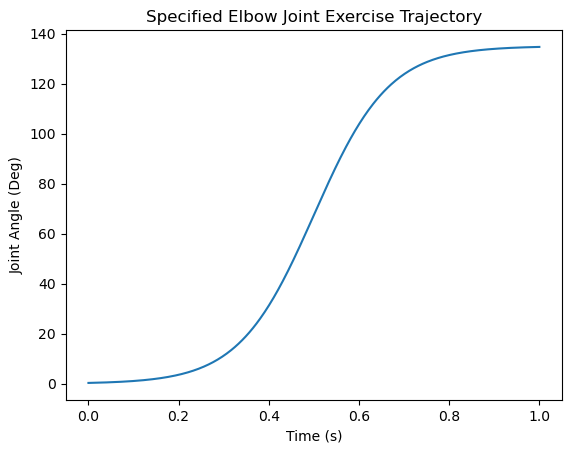

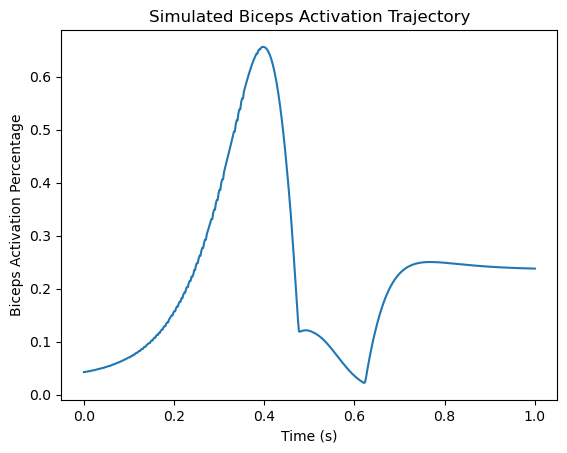

In [15]:
step_per_second = 500
curl_time = 1 #in seconds
bicep = Bicep_Curl(curl_time = curl_time, sps = step_per_second)

# Run Simulation Under zero external force
activation = []
for i in range(int(curl_time*step_per_second)):
    activation.append(bicep.step_simulation(i, [0, 0, 0]))


#Plotting
t, elbow_traj = bicep._traj()
plt.plot(t, np.rad2deg(elbow_traj)) 
plt.xlabel("Time (s)")
plt.ylabel("Joint Angle (Deg)")
plt.title("Specified Elbow Joint Exercise Trajectory")
plt.show()

plt.plot(t, activation)
plt.xlabel("Time (s)")
plt.ylabel("Biceps Activation Percentage")
plt.title("Simulated Biceps Activation Trajectory")
plt.show()

# **Plot Two Trajectories**

In [ ]:
G = {
    'G_p': 100,
    'G_i': 200,
    'G_d': 0.1
}

log_good = run(curl_time = 1, G = G, sps = 500, plot = False)

In [20]:
B = {
    'G_p': 500,
    'G_i': 500,
    'G_d': 1
}

bad_log = run(curl_time = 1, G = B, sps = 100, plot = False, yaml = 'config_bad.yaml')

**Plot**

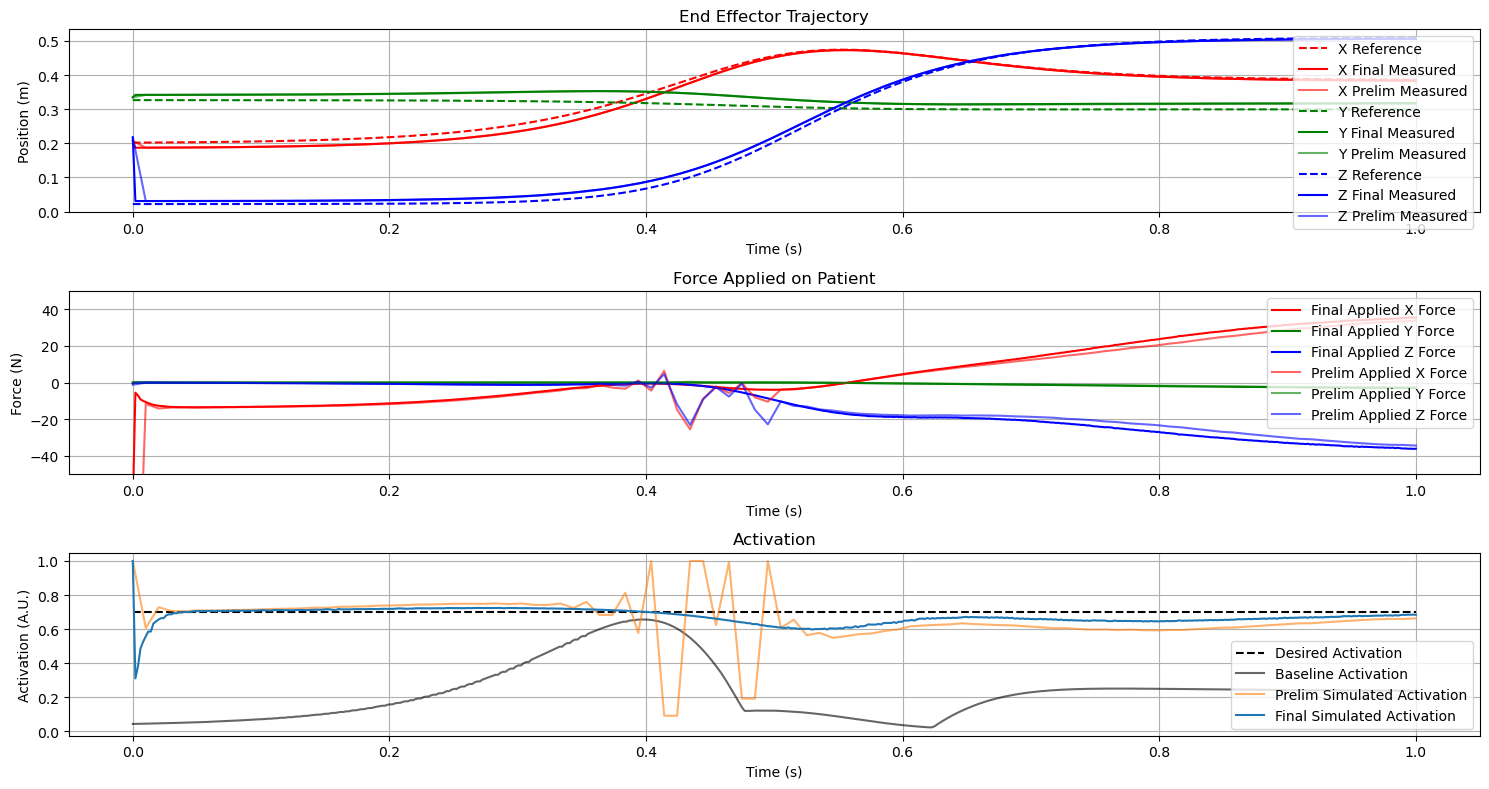

In [27]:
plt.figure(figsize=(15, 8))

plt.subplot(3, 1, 1)
plt.title('End Effector Trajectory')
colors = ['r', 'g', 'b']
for i, (label, color) in enumerate(zip(['X', 'Y', 'Z'], colors)):
    plt.plot(log_good["time"], log_good["x_ref"][:, i], linestyle='--', color=color, label=f"{label} Reference")
    plt.plot(log_good["time"], log_good["measured_position"][:, i], color=color, label=f"{label} Final Measured")
    plt.plot(bad_log["time"], bad_log["measured_position"][:, i], color=color, alpha = 0.6, label=f"{label} Prelim Measured")
plt.ylabel("Position (m)")
plt.xlabel("Time (s)")
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 2)
plt.title('Force Applied on Patient')
plt.plot(log_good["time"], log_good["applied_force"][:, 0], label="Final Applied X Force", color = 'r')
plt.plot(log_good["time"], log_good["applied_force"][:, 1], label="Final Applied Y Force", color = 'g')
plt.plot(log_good["time"], log_good["applied_force"][:, 2], label="Final Applied Z Force", color = 'b')
plt.plot(bad_log["time"], bad_log["applied_force"][:, 0], label="Prelim Applied X Force", color = 'r', alpha = 0.6)
plt.plot(bad_log["time"], bad_log["applied_force"][:, 1], label="Prelim Applied Y Force", color = 'g', alpha = 0.6)
plt.plot(bad_log["time"], bad_log["applied_force"][:, 2], label="Prelim Applied Z Force", color = 'b', alpha = 0.6)
plt.ylim([-50,50])
plt.ylabel("Force (N)")
plt.xlabel("Time (s)")
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 3)
plt.title('Activation')
plt.plot(log_good["time"], log_good["desired_activation"], label="Desired Activation", linestyle = '--', c = 'black')
plt.plot(t, activation, label = "Baseline Activation", c = 'black', alpha = 0.6)
plt.plot(bad_log["time"], bad_log["simulated_activation"], label="Prelim Simulated Activation", c = "tab:orange", alpha = 0.6)
plt.plot(log_good["time"], log_good["simulated_activation"], label="Final Simulated Activation", c = "tab:blue")
plt.ylabel("Activation (A.U.)")
plt.xlabel("Time (s)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()